In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics
%matplotlib inline

# First Generate Random Data Centered Around Three Clusters

In [20]:
#Make test data
def make_cluster( x, y, var, num=30, label=0):
    xt = np.random.normal(x, var, num)
    yt = np.random.normal(y, var, num)

    return np.stack((yt,xt, label*np.ones((num))),axis=1)

num=60
x1=make_cluster(7,2,0.7,num,0)
x2=make_cluster(8,7,0.8,num,1)
x3=make_cluster(3,5,1.0, num,2)

df = pd.DataFrame( data=np.concatenate((x1,x2,x3)),columns=['x','y','class'] )

# Lets take a look at the data we just generated

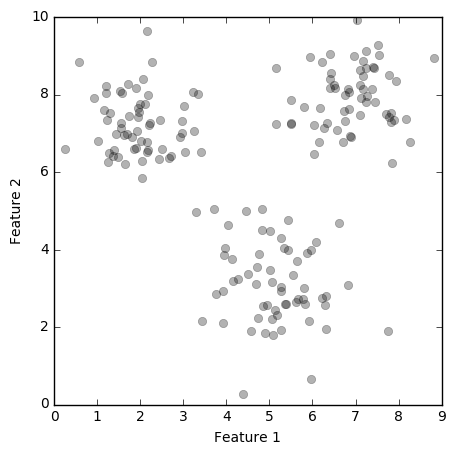

In [21]:
plt.figure(figsize=(5,5))
plt.plot(df.x,df.y,'ko',alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Now Use KMeans To Generate Clusters

### First Randomly Chose 'K' Pilot Points
Lets 'guess' K=3 for now. Try it again with K=2 or 4 and see what happens! 

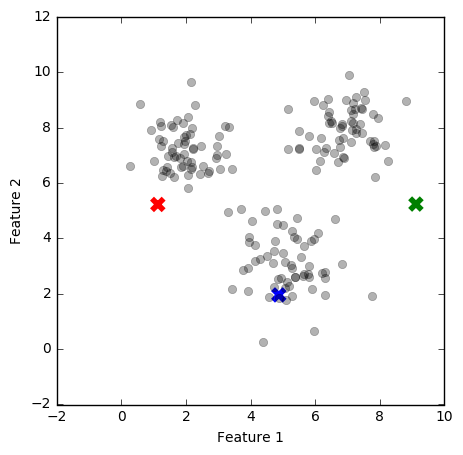

In [22]:
K=3

plt.figure(figsize=(5,5))
plt.plot(df.x,df.y,'ko', alpha=0.3)

centers = 10*np.random.random_sample((K,2))
colors=['red','green','blue']
plt.scatter(centers[:,0],centers[:,1],color=colors,marker='x',s=70,linewidths=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Now Assign The Data To A Cluster Based Upon Proximity To The Pilot Points  

In [23]:
assign = sklearn.metrics.pairwise_distances_argmin_min(df[['x','y']], centers)[0]

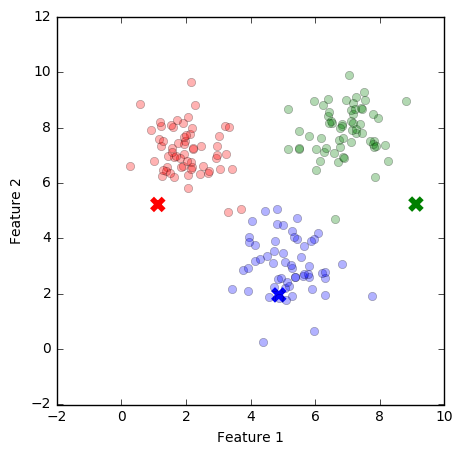

In [24]:
plt.figure(figsize=(5,5))
plt.plot(df.x[assign==0],df.y[assign==0],'o',color=colors[0], alpha=0.3)
plt.plot(df.x[assign==1],df.y[assign==1],'o',color=colors[1], alpha=0.3)
plt.plot(df.x[assign==2],df.y[assign==2],'o',color=colors[2], alpha=0.3)
plt.scatter(centers[:,0],centers[:,1],color=colors,marker='x',s=70,linewidths=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Now Update The Pilot Points to the Cluster Center of Mass

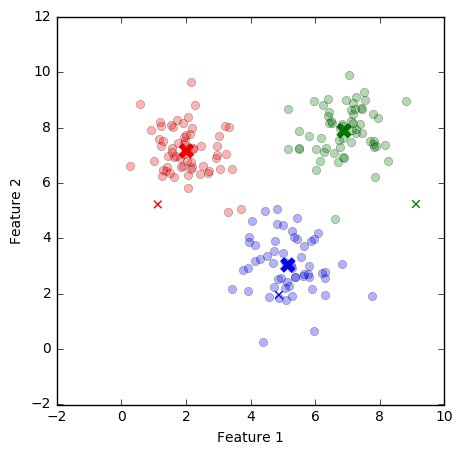

In [25]:
new_center = df[['x','y']].groupby(assign).agg(np.mean).values
plt.figure(figsize=(5,5))
plt.plot(df.x[assign==0],df.y[assign==0],'o',color=colors[0], alpha=0.3)
plt.plot(df.x[assign==1],df.y[assign==1],'o',color=colors[1], alpha=0.3)
plt.plot(df.x[assign==2],df.y[assign==2],'o',color=colors[2], alpha=0.3)
plt.scatter(centers[:,0],centers[:,1],color=colors,marker='x',s=30,linewidths=1)
plt.scatter(new_center[:,0],new_center[:,1],color=colors,marker='x',s=70,linewidths=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Now Reassign The Data To A Cluster Based Upon the New Pilot Points  and Repeat this Until Convergance

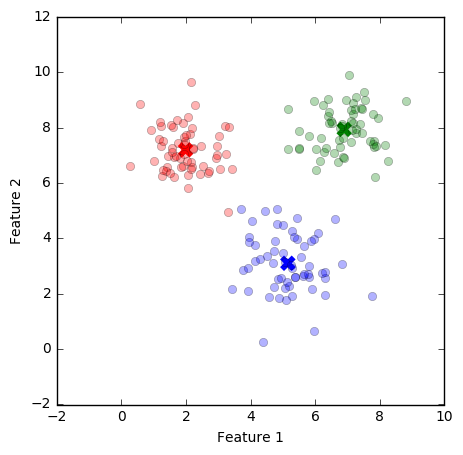

In [26]:
assign = sklearn.metrics.pairwise_distances_argmin_min(df[['x','y']], new_center)[0]
new_center = df[['x','y']].groupby(assign).agg(np.mean).values
plt.figure(figsize=(5,5))
plt.plot(df.x[assign==0],df.y[assign==0],'o',color=colors[0], alpha=0.3)
plt.plot(df.x[assign==1],df.y[assign==1],'o',color=colors[1], alpha=0.3)
plt.plot(df.x[assign==2],df.y[assign==2],'o',color=colors[2], alpha=0.3)
plt.scatter(new_center[:,0],new_center[:,1],color=colors,marker='x',s=70,linewidths=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

If you run this program many times you might observe not all starting pilot point positions converge to the same solution. This is common with K-Means clusitering and typically many runs are are preformed to select the cluster assigments you like most.

## Now that we know how its done we can do the same thing using sklearn
It would be silly to recode this every time we wanted to do KMean clustering!

In [27]:
from sklearn.cluster import KMeans

#Create a KMeans fitter
kmc = KMeans(n_clusters=3, init=centers, n_init=1)

#Fit it
kmc.fit(df[['x','y']])

#Now get the class assigments!
df['class']=kmc.predict(df[['x','y']])

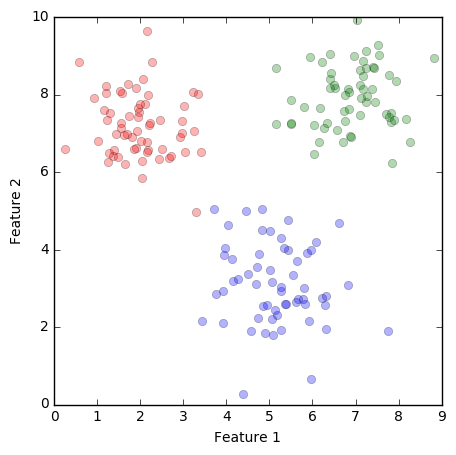

In [28]:
plt.figure(figsize=(5,5))
plt.plot(df.x[df['class']==0],df.y[df['class']==0],'o',color=colors[0], alpha=0.3)
plt.plot(df.x[df['class']==1],df.y[df['class']==1],'o',color=colors[1], alpha=0.3)
plt.plot(df.x[df['class']==2],df.y[df['class']==2],'o',color=colors[2], alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()